# What is Feature Scaling?

Feature scaling is the process of normalizing or standardizing the range of features (input variables) in a dataset. It is an important step in preparing data for machine learning algorithms that use distance-based metrics, such as k-nearest neighbors or support vector machines.

The goal of feature scaling is to ensure that all features are on a comparable scale, which can help the algorithm to converge faster and achieve better accuracy. This is because if the features are on different scales, the algorithm may assign more weight to the features with larger scales and less weight to the features with smaller scales, which can lead to biased results.

There are two common methods for feature scaling: normalization and standardization. Normalization scales the features to have values between 0 and 1, whereas standardization scales the features to have a mean of 0 and a standard deviation of 1. The choice of method depends on the specific dataset and algorithm being used.

# Importing Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Data Science\Extra topics\Social_Network_Ads.csv")[['Age','EstimatedSalary','Purchased']]
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Train & Testing Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# Standard Scalar

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [30]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


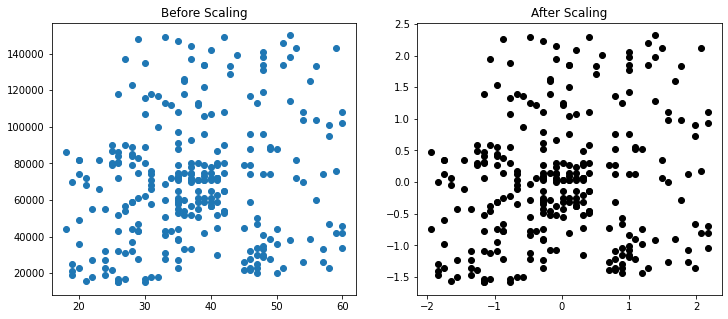

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='black')
ax2.set_title("After Scaling")
plt.show()

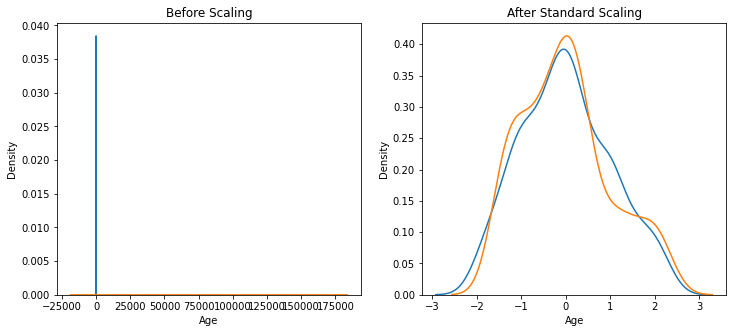

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparision Of Distributions

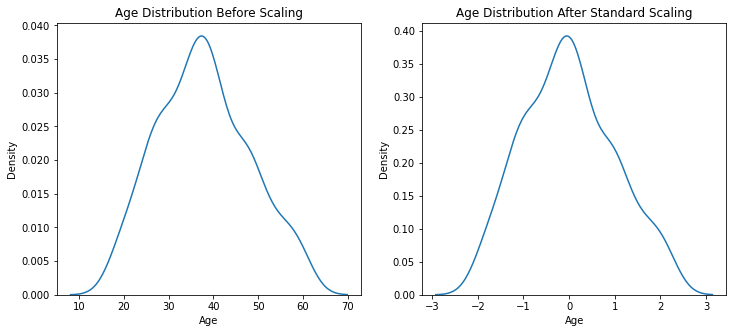

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

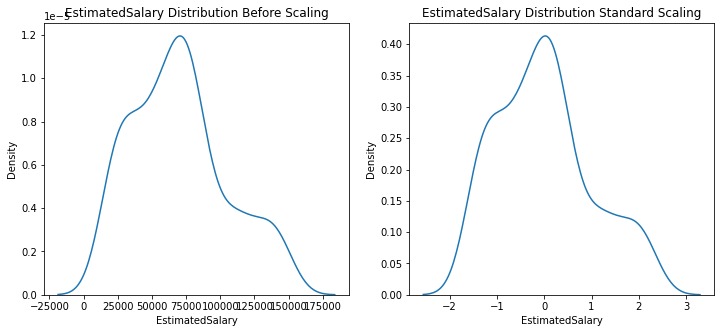

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('EstimatedSalary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('EstimatedSalary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Importance of Scaling

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [42]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [45]:
print("Actual Accuracy",accuracy_score(y_test,y_pred))
print("Scaled Accuracy",accuracy_score(y_test,y_pred_scaled))

Actual Accuracy 0.6583333333333333
Scaled Accuracy 0.8666666666666667


# Effects of Scaling on Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [51]:
print("Actual Accuracy",accuracy_score(y_test,y_pred))
print("Scaled Accuracy",accuracy_score(y_test,y_pred_scaled))

Actual Accuracy 0.875
Scaled Accuracy 0.875


In [52]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Scaling is generally not required for decision trees, as they are not affected by the scale of the features. Decision trees work by partitioning the feature space into regions based on the feature values. The splitting criterion used in decision trees, such as Gini index or entropy, only depends on the relative ordering of the feature values and not on the actual feature values themselves.

Therefore, decision trees are insensitive to the absolute magnitude of the feature values and work well with both normalized and non-normalized features. Scaling is not expected to improve the performance of decision trees.

However, if there are other algorithms or techniques used in conjunction with decision trees, such as clustering or PCA, that are sensitive to feature scales, then scaling may be required for those techniques.

In summary, scaling is not typically required for decision trees, but it may be necessary for other methods used in conjunction with decision trees.





